# Use Seasonal Arima (Autoregressive Integrated Moving Average) to Predict Revenue 

In this project, I created a Python notebook for predicting financial revenue of Bank using Auto Arima statistical method for time series forecasting as we take into account the past values to predict the future values of our bank revenues.

- p (past values used for forecasting the next value)

- q (past forecast errors used to predict the future values)

- d (order of differencing)


## Understanding the Problem Statement

Our focus is to do the technical analysis by analyzing the company’s future profitability on the basis of its current business financial performance by reading the charts and using statistical figures to identify the trends. 



## Data Sources:
* revenue_2009_2016.csv :  Processed data as an output from the data-preparation. Notebook available [here.](https://github.com/CFerraren/PyBank/blob/master/1-Data_Prep.ipynb)




### Task is to create a Python script that analyzes the records to calculate each of the following:

- Use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error. 

- Split our data into train and validation sets to verify our predictions.


- Plot results.

### Changes:

- 02-12-2018: Started the project

- 12-11-2018: Updated the project using Python Pandas and added visualization using matplotlib, Tableau, and Univariate Linear Regression Machine learning to predict future bank revenue.


---

### Installing Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import packages
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import itertools

In [3]:
#to plot within the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [5]:
#use seaborn to prettify the plots
import seaborn as sns
sns.set_style('whitegrid')

In [6]:
#display pd typeformat
pd.set_option('display.float_format', '{:,.0f}'.format)

In [7]:
#directory and filename
dir = 'data/processed/'
file = 'revenue_2009_2016.csv'

### Indexing with Time-series Data

In [8]:
#load csv into dataframe and print the head
#parse the date colum to datetime format
#set 'Date' column to index
df = pd.read_csv(os.path.join(dir, file), parse_dates=['Date'], index_col='Date')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,86,"650,527","680,460","-1,063,151","279,551","686,900","1,118,162","2,211,086"


In [10]:
# The 'MS' string groups the data in buckets by start of the month
df = df['Revenue'].resample('MS').mean()
df[:5]

Date
2009-01-01     943,690
2009-02-01   1,062,565
2009-03-01     210,079
2009-04-01    -735,286
2009-05-01     842,933
Freq: MS, Name: Revenue, dtype: float64

### Visualizing Time-series Data

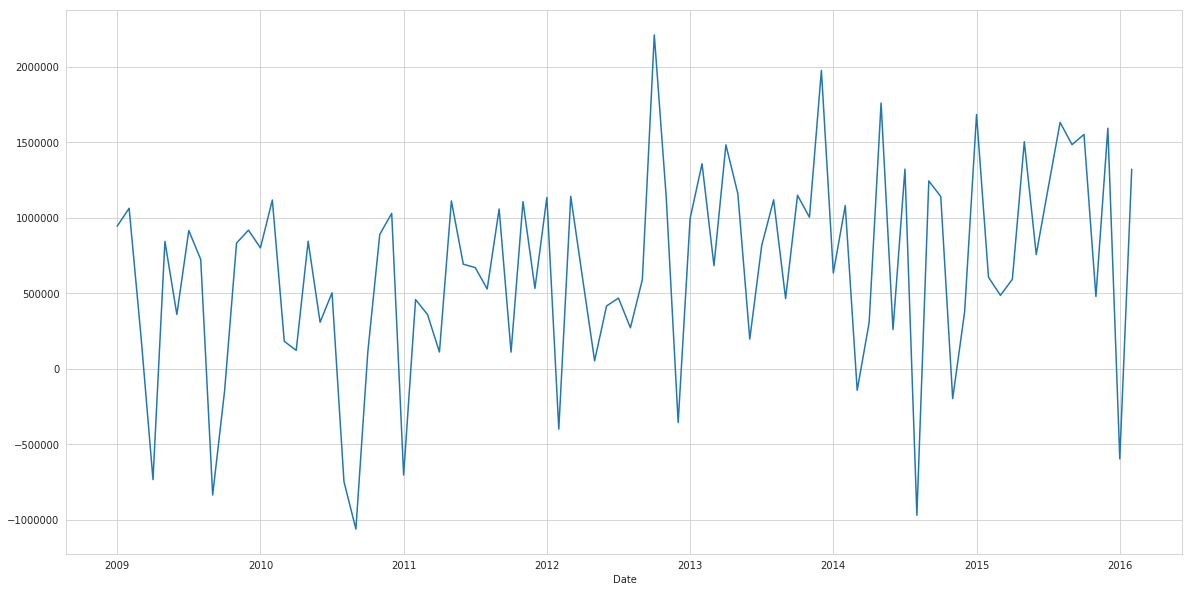

In [11]:
#plot
df.plot()
plt.show()

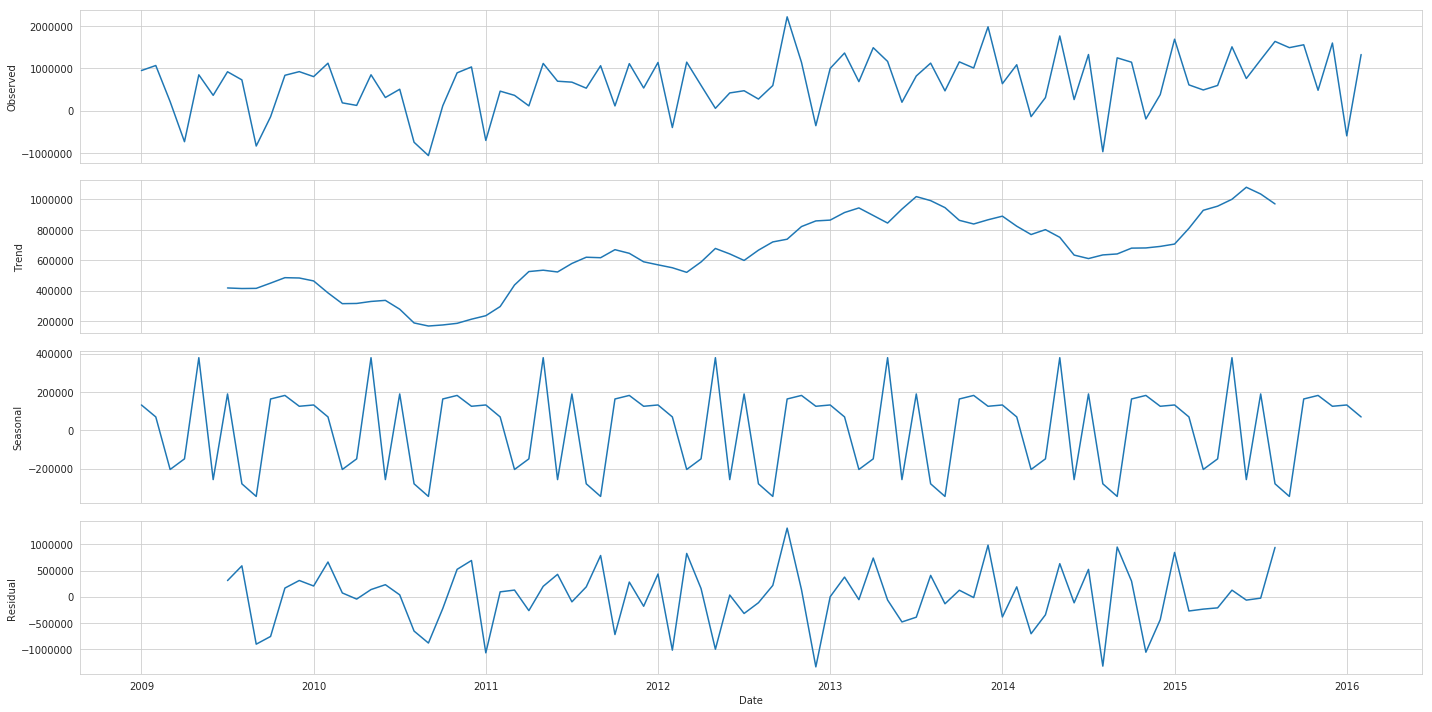

In [12]:
#visualized data using method called time-series decomposition:trend, seasonality, and noise
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

---

### The ARIMA Time Series Model

#### Parameter Selection for the ARIMA Time Series Model

In [13]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

In [14]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2581.059339241023
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2216.0613367714654
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2219.6845761445397
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1840.0785967204906
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2233.342512148824
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2194.222633670958
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1871.4876630950928
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1833.0967991915963
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2540.6238168335353
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2179.8631850442634
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2190.613763726765
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1810.0123708466149
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2235.7124596557733
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2168.8227130085925
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1875.1725179142154
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1810.5255140158908
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2554.849551918596
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2195.03932434024

### Fitting an ARIMA Time Series Model

In [16]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1648      0.451     -0.366      0.715      -1.049       0.719
ma.L1         -0.8663      0.189     -4.589      0.000      -1.236      -0.496
ar.S.L12      -0.2479      0.319     -0.777      0.437      -0.873       0.378
ma.S.L12      -0.7920      0.256     -3.095      0.002      -1.294      -0.291
sigma2      1.068e+12   7.32e-14   1.46e+25      0.000    1.07e+12    1.07e+12


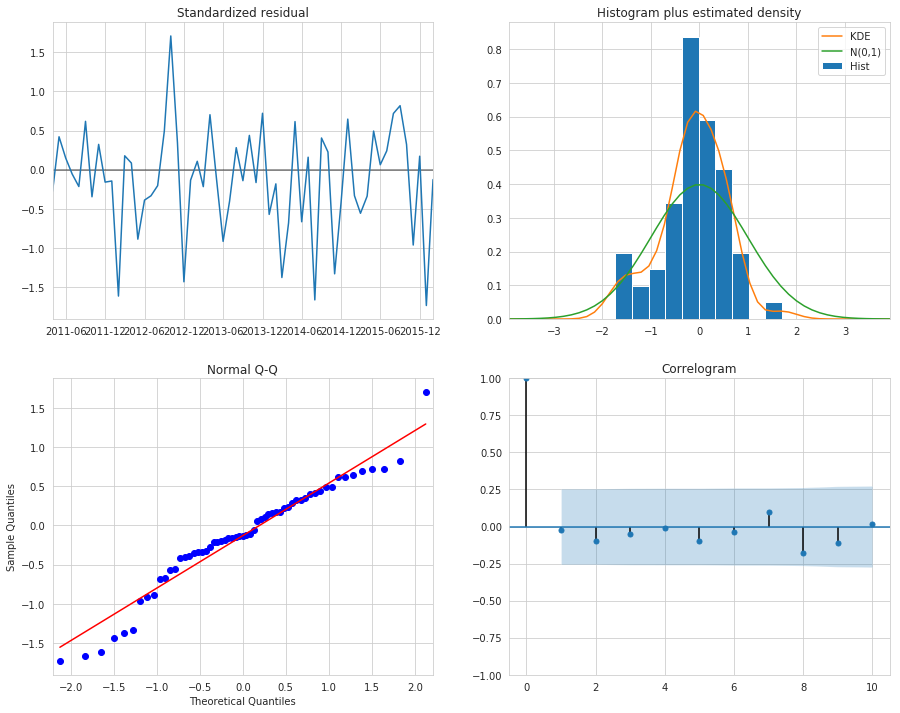

In [17]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

### Validating Forecasts

In [18]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()

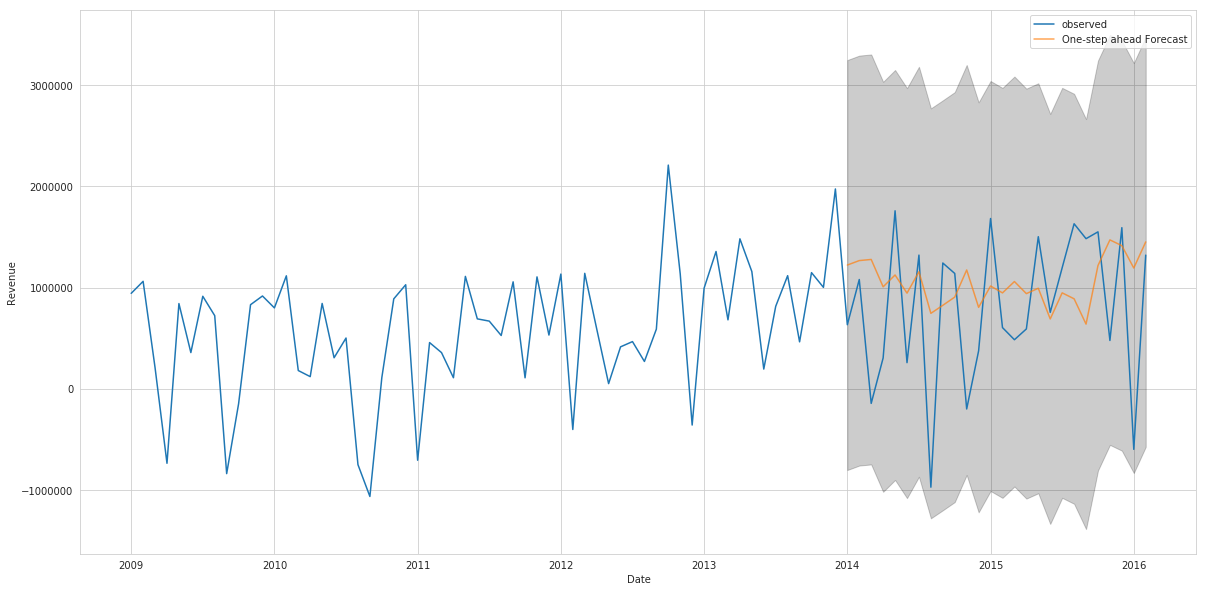

In [19]:
ax = df['2009':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()

plt.show()

In [20]:
df_forecasted = pred.predicted_mean
df_truth = df['2014-01-01':]

# Compute the mean square error
mse = ((df_forecasted - df_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 615775279808.6


In [21]:
#dynamic

pred_dynamic = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

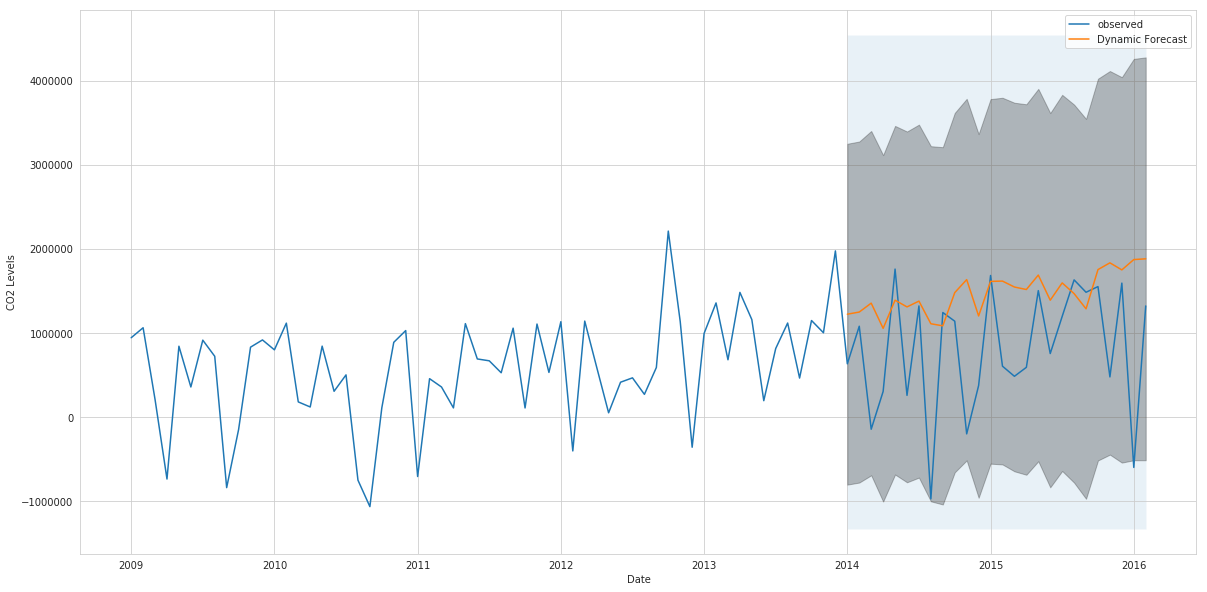

In [22]:
ax = df['2009':].plot(label='observed')
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-01-01'), df.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [23]:
df_forecasted = pred_dynamic.predicted_mean
df_truth = df['2014-01-01':]

# Compute the mean square error
mse = ((df_forecasted - df_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 958910098697.8


### Producing and Visualizing Forecasts

In [24]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

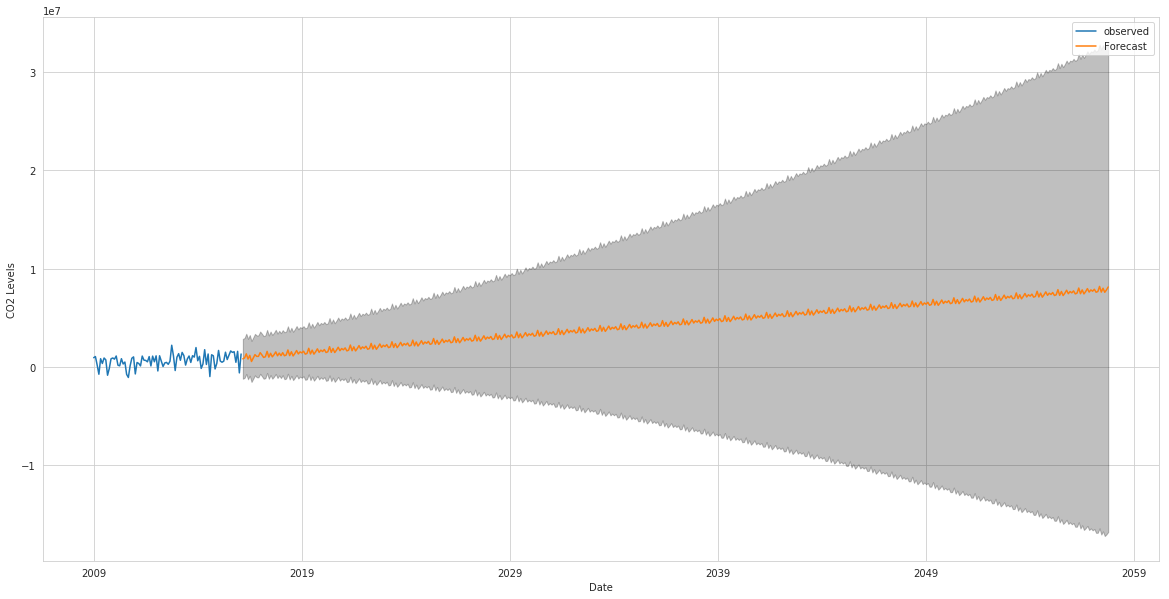

In [25]:
ax = df.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()